# NUMPY

In [33]:
import numpy as np

x = np.arange(0,100)

print(x)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


In [34]:
def y_x(x):
    return x

In [35]:
y = y_x(x)

print(y)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


# MATPLOTLIB

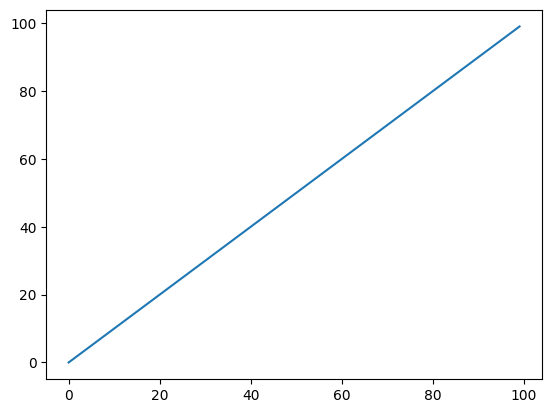

In [36]:
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.plot(x,y)


In [37]:
noise = np.random.normal(0,5,100)

In [38]:
y_error = y + noise

print(y_error)

[  0.67010748   3.89931475 -11.92382702  10.12511424   2.43713367
  14.64905636   8.33570655   6.15100952   6.2208908   14.47545923
   2.13374049   7.30690018  10.54255526  12.21981125  12.66557888
  11.67661993  12.41297884  16.67512884  12.32904972  18.61582291
  16.94194256  25.96465875  17.1750577   18.12468288  18.39341501
  25.48108572  28.70991789  28.55375841  29.47410802  18.10812799
  30.13060525  31.83705422  35.51144021  38.36328076  37.4702694
  35.16740292  31.85942069  38.78362094  35.41012899  38.93897442
  45.88281943  38.26247753  32.46693189  47.26237521  37.64766042
  46.23268119  44.66932783  49.07138467  54.03803952  49.32814174
  48.89875626  46.37702457  40.66833062  49.13836422  42.09938868
  53.27698089  60.65511677  62.05529846  57.02623407  59.02710525
  50.38614827  64.79943295  50.98450668  63.55652624  65.74488472
  61.8686715   56.50502719  67.52644326  59.27817609  76.1637403
  72.49093174  71.68132302  64.58835933  70.33298977  72.05408354
  76.0085790

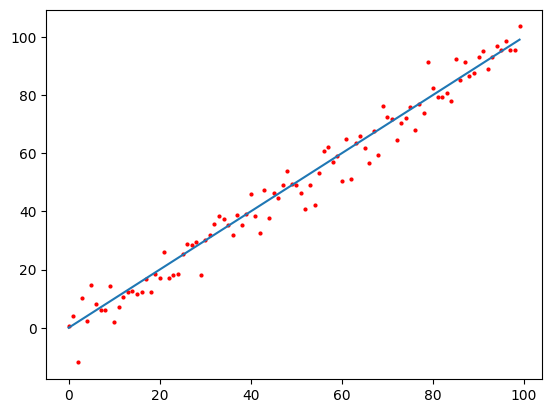

In [39]:
fig = plt.figure()

ax1 = fig.add_subplot(111)

plt.rcParams['lines.markersize'] = 2
plt.plot(x, y)
plt.scatter(x, y_error, color = 'Red')
plt.show()


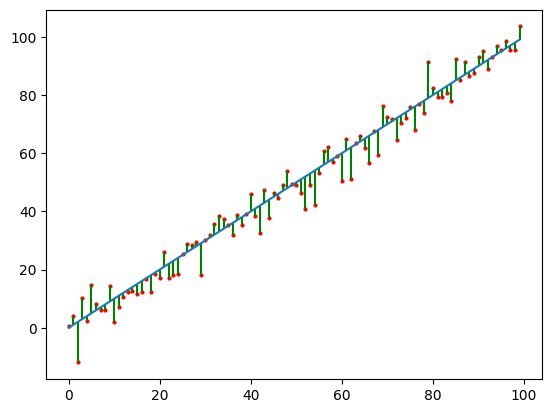

In [40]:
plt.rcParams['lines.markersize'] = 1

for a, b, c in zip(x,y,y_error):
    plt.vlines(a, ymin=b, ymax=c, colors='green')

plt.rcParams['lines.markersize'] = 2
plt.plot(x,y)
plt.scatter(x,y_error, color = 'Red' )
plt.show()

To calculate the Mean Square Error: 

    MSE = Σ(y_i_observed - y_i_actual)/n

In [41]:
def calculate_mse(actual,observed):
    sum = 0
    for i,j in zip(actual, observed):
        sum = sum + (j-i)**2
    
    mse = sum/len(actual)
    return mse
        

In [42]:
mse = calculate_mse(y,y_error)

print(mse)

24.239525844871086


In [66]:
def show_graph(x,y,error):
    mse = calculate_mse(y,error)
    plt.title(f"MSE = {mse}")
    plt.grid()
    
    plt.rcParams['lines.markersize'] = 1
    plt.subplot(2,1,1)
    plt.plot(x,y)
    for a, b, c in zip(x,y,error):
        plt.vlines(a,ymin=b, ymax=c, colors='green')
    plt.scatter(x,error, color = 'Red' )
    plt.rcParams['lines.markersize'] = 2

    plt.subplot(2,1,2)
    plt.plot(x,error, color = 'Red' )
    plt.show()

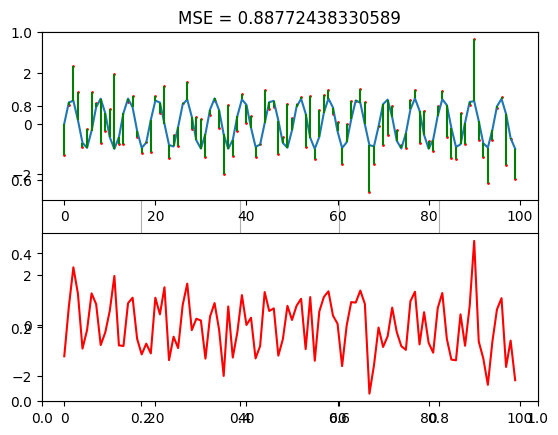

In [67]:
show_graph(x,y,y_error)

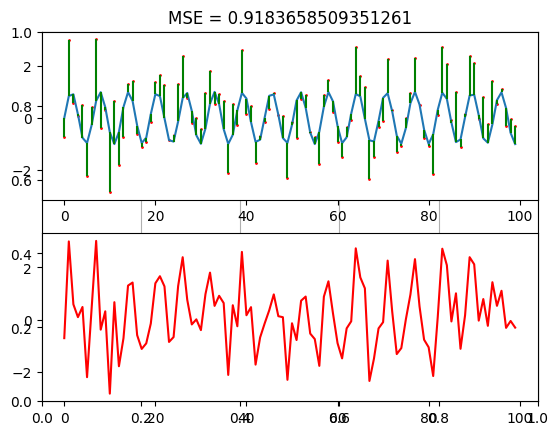

In [82]:
y = np.sin(x)
noise = np.random.normal(0,1,100)

y_error = y + noise

show_graph(x,y,y_error)

# SciPy


In [69]:
from scipy import interpolate

def show_graph_with_inter(x,y):
    f = interpolate.interp1d(x,y,kind='cubic')
    xnew= np.arange(x[0],x[99],(x[99]-x[0])/1000)
    ynew = f(xnew)
    plt.plot(xnew, ynew)


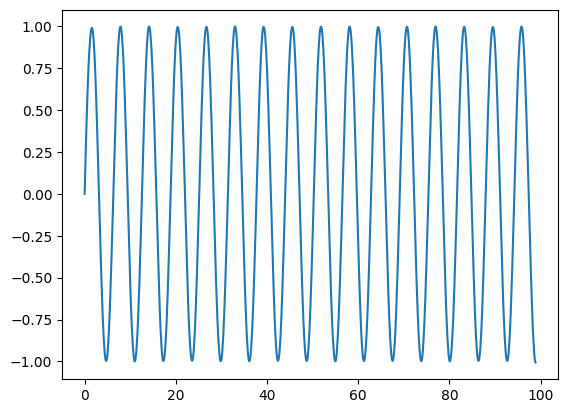

In [70]:
show_graph_with_inter(x,y)

In [75]:
def plot_ideal_and_noisy_version_of_data(x,y, noise_dist):

    noise = np.random.normal(0,noise_dist,len(y))
    y_error = y + noise
    plt.subplot(2,1,1)
    show_graph(x,y,y_error)
    plt.subplot(2,2,1)
    show_graph_with_inter(x,y)


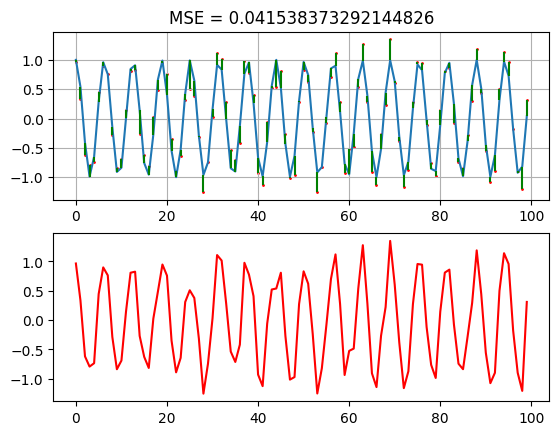

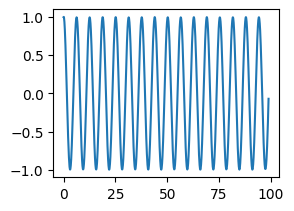

In [84]:
y = np.cos(x)
noise_dist = 0.2

plot_ideal_and_noisy_version_of_data(x,y,noise_dist)

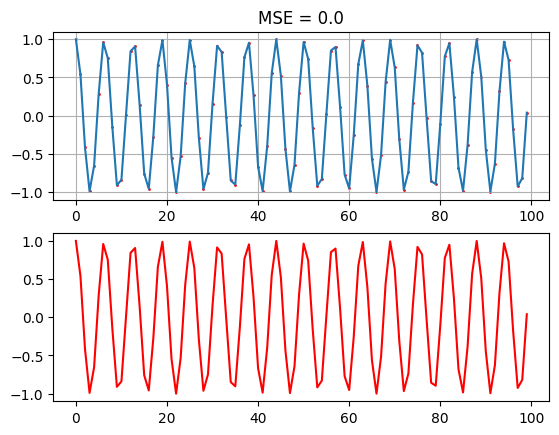

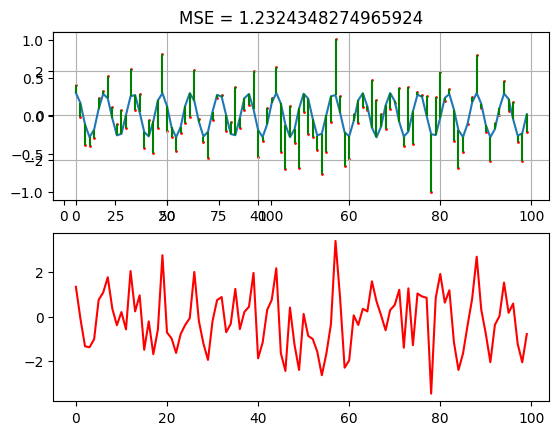

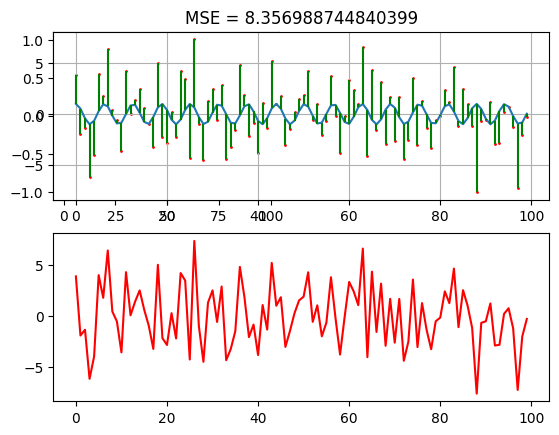

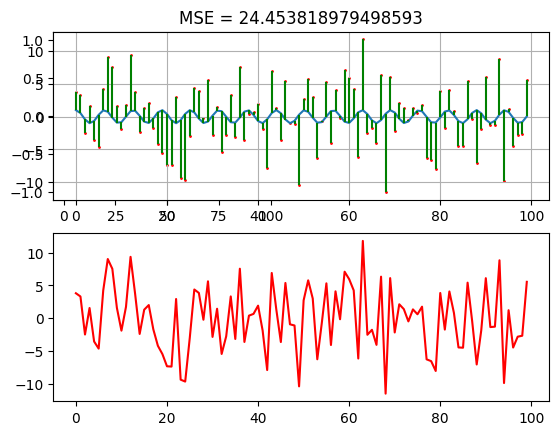

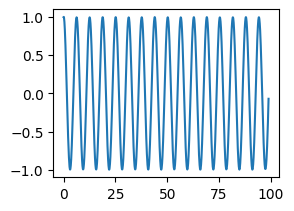

In [89]:
SD_values = [0,1,3,5]
for i in SD_values: 
    plot_ideal_and_noisy_version_of_data(x,y,i)

## Comparing the MSE values between an ideal sine function and a nosiy cosine function 

In [90]:
y_sine =   np.sin(x)
y_cosine = np.cos(x)

random_noise = np.random.normal(0,0.1,100)

y_cosine_noise = y_cosine + random_noise 
y_sine_noise = y_sine + random_noise 

calculate_mse(y_sine,y_cosine_noise)

0.9819199796773705

## Comparing the MSE values between an ideal linear function and a nosiy log function 

In [102]:
x= np.arange(1,100)
random_noise = np.random.normal(0,0.1,99)

y_linear = x 
y_log = np.log(x)

y_log_noise = y_log + random_noise 
y_linear_noise = y_linear + random_noise 

calculate_mse(y_linear,y_log_noise)

2921.3895622590876

## Comparing the MSE values between an ideal linear function and a nosiy log function for varying slopes

In [112]:
x= np.arange(1,100)
random_noise = np.random.normal(0,0.1,99)
a = [50,10,5,1,0.5, 0.05, 0.005,0.0005]

y_log = np.log(x)

y_log_noise = y_log + random_noise 

for i in a:
    y_linear = i*x 
    print(i)
    print(calculate_mse(y_linear,y_log_noise))

50
8271004.6580273025
10
327545.6768122582
5
80863.30416037783
1
2917.4060388735056
0.5
636.6687736854668
0.05
1.8802350162315884
0.005
12.280131149308076
0.0005
14.058908262615725
